In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.markers import MarkerStyle
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pathlib import Path
import seaborn as sns

# File to Load (Remember to Change These)
sales_csv = Path("Resources/vgsales.csv")

# Read School and Student Data File and store into Pandas DataFrames
sales_data = pd.read_csv(sales_csv)



In [2]:
sales_data = sales_data.drop(columns="Rank")

In [3]:
#Establish console maker
sales_data['Platform Company'] = sales_data['Platform']

In [4]:
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["N64","GC","Wii","WiiU","NES","GB","DS","SNES","GBA","3DS"],"Nintendo")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["PS","PS2","PS3","PSV","PSP","PS4"],"Sony")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["XOne","XB","X360"],"Microsoft")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["GG","SAT","Sega","GEN","SCD","DC"],"Sega")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["2600"],"Atari")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["WS"],"BANDAI")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["NG"],"SNK")
sales_data["Platform Company"] = sales_data["Platform Company"].replace(["TG16","PCFX"],"NEC")
sales_data["Platform Company"].unique()

array(['Nintendo', 'Microsoft', 'Sony', 'PC', 'Atari', 'Sega', 'BANDAI',
       'SNK', 'NEC', '3DO'], dtype=object)

In [5]:
sales_data["Genre"] = sales_data["Genre"].replace(["Sports","Racing"],"Sports & Racing")
sales_data["Genre"] = sales_data["Genre"].replace(["Puzzle","Strategy"],"Puzzle & Strategy")
sales_data["Genre"] = sales_data["Genre"].replace(["Platform"],"Adventure")

In [6]:
sales_data["Year"].isnull().sum()

271

In [7]:
#drop games with null year
sales_data_clean = sales_data.dropna(subset=["Year"]).copy()

In [8]:
sales_data_clean["Year"] = sales_data_clean["Year"].astype(int)

In [9]:
sales_data_clean.sort_values("Year")

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
6896,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24,Atari
2669,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77,Atari
5366,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34,Atari
1969,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05,Atari
1766,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15,Atari
...,...,...,...,...,...,...,...,...,...,...,...
4820,EA Sports UFC 2,XOne,2016,Sports & Racing,Electronic Arts,0.23,0.14,0.00,0.04,0.40,Microsoft
16241,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01,Sony
16438,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01,Sony
14390,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,Sony


In [10]:
year_2016 = sales_data_clean[sales_data_clean["Year"] == 2016].index
sales_data_clean.drop(year_2016, inplace=True)

In [11]:
year_2017 = sales_data_clean[sales_data_clean["Year"] == 2017].index
sales_data_clean.drop(year_2017, inplace=True)

In [12]:
year_2020 = sales_data_clean[sales_data_clean["Year"] == 2020].index
sales_data_clean.drop(year_2020, inplace=True)

In [13]:
genre_name = []

for x in sales_data_clean["Genre"]:
    
    if x not in genre_name:
        genre_name.append(x)
genre_name.sort()

In [14]:
#cmap = LinearSegmentedColormap.from_list('custom_colors',["#000000", "#026873", "#04BFBF", "#F2CB05", "#F2A007", "#ff0000"])

The correlation is 0.45.


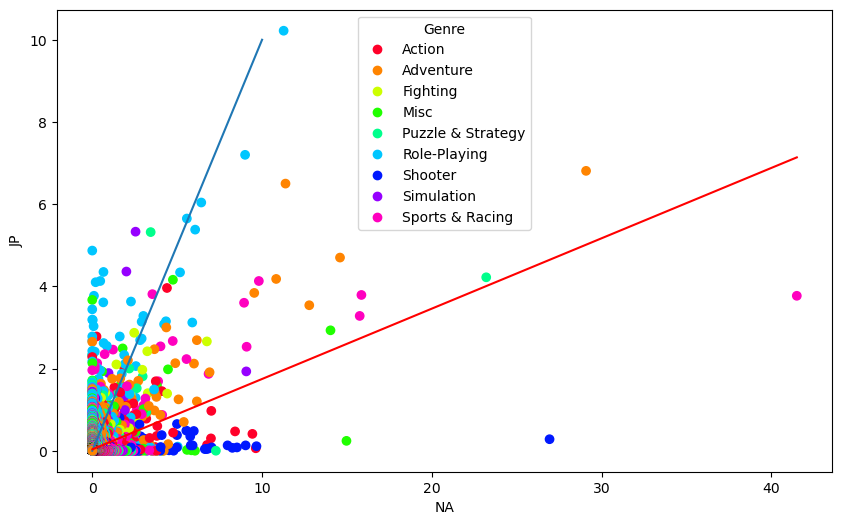

In [15]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("JP")
plt.show()

The correlation is 0.77.


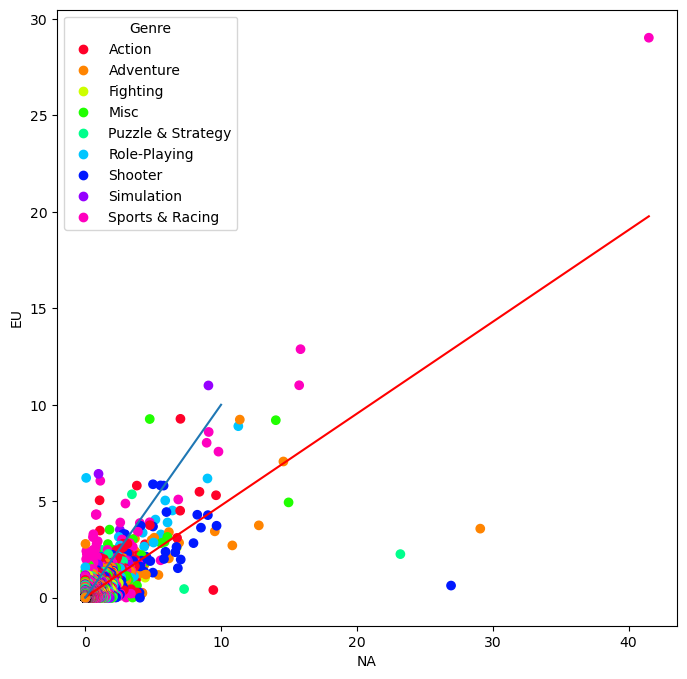

In [16]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(8,8))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("EU")
plt.show()

The correlation is 0.63.


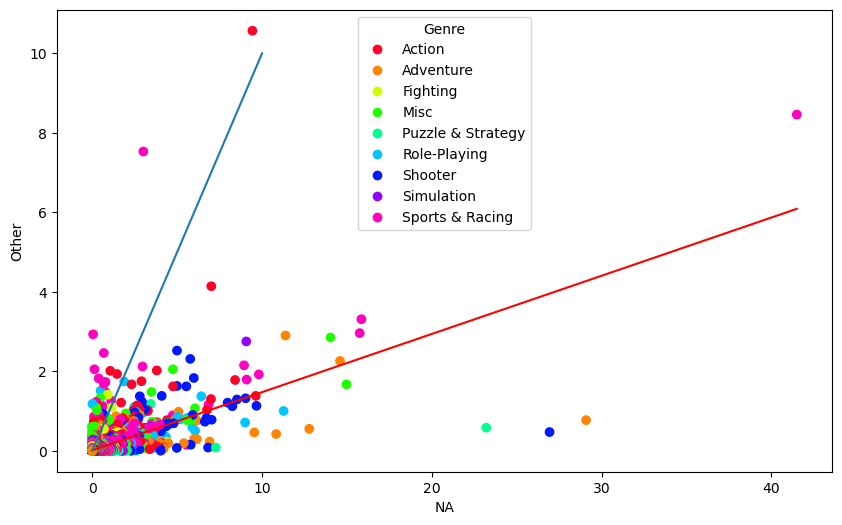

In [17]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["Other_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["Other_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

x = np.linspace(0,10,100)
y = x
plt.plot(x,y)


#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("Other")
plt.show()

The correlation is 0.44.


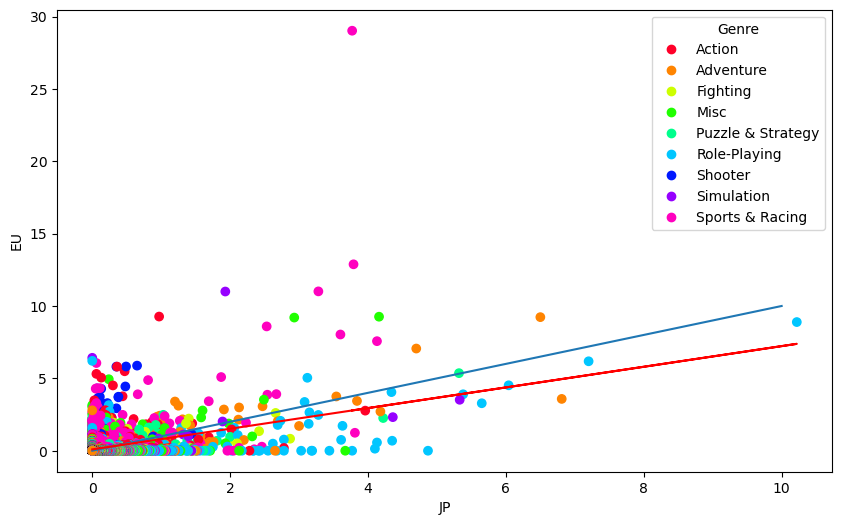

In [18]:
corr = round(st.pearsonr(sales_data_clean["JP_Sales"], sales_data_clean["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["JP_Sales"]
y_values = sales_data_clean["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")


x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("JP")
plt.ylabel("EU")
plt.show()

The correlation is 0.73.


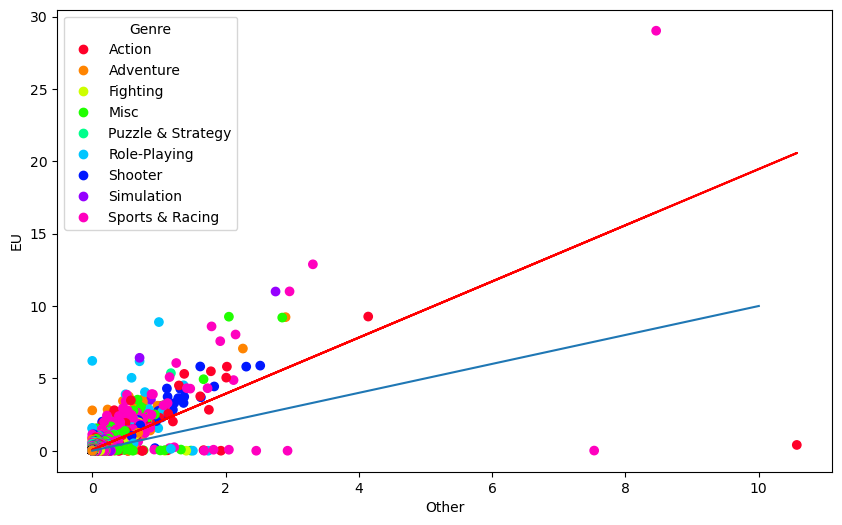

In [19]:
corr = round(st.pearsonr(sales_data_clean["Other_Sales"], sales_data_clean["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs JP
x_values = sales_data_clean["Other_Sales"]
y_values = sales_data_clean["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("Other")
plt.ylabel("EU")
plt.show()

The correlation is 0.94.


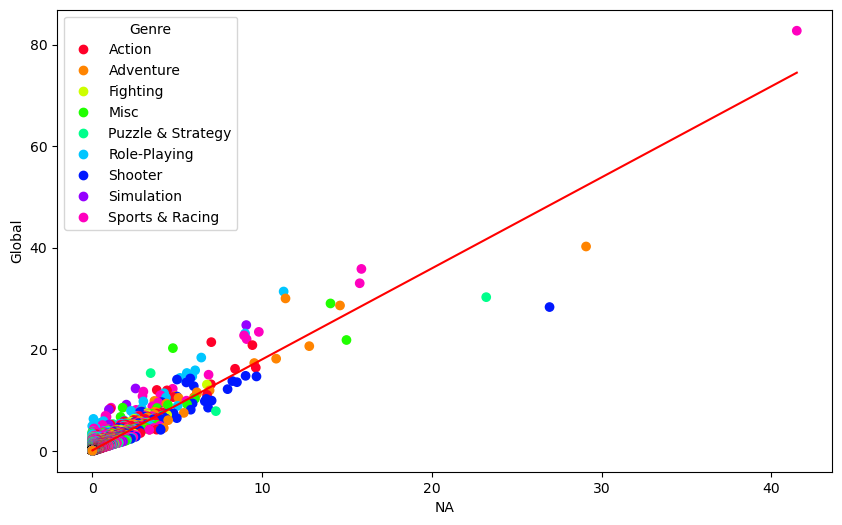

In [20]:
corr = round(st.pearsonr(sales_data_clean["NA_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = sales_data_clean["NA_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("Global")
plt.show()

The correlation is 0.61.


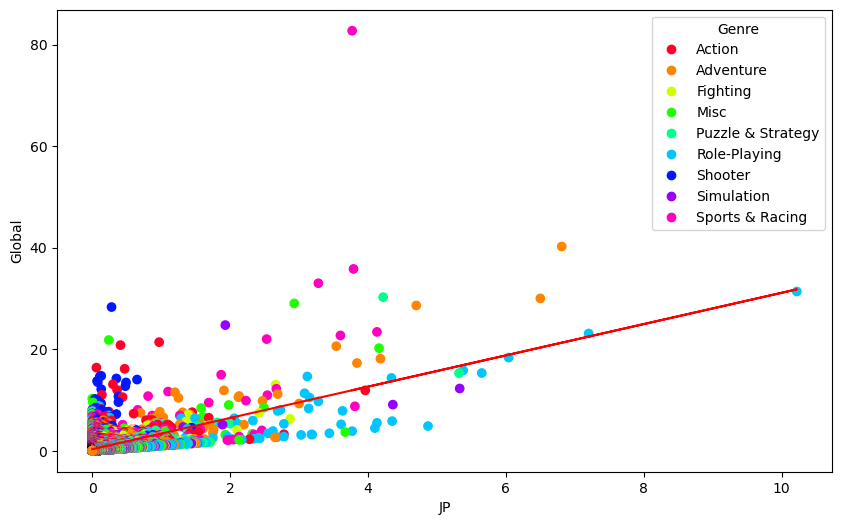

In [21]:
corr = round(st.pearsonr(sales_data_clean["JP_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#JP vs Global

x_values = sales_data_clean["JP_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("JP")
plt.ylabel("Global")
plt.show()

The correlation is 0.9.


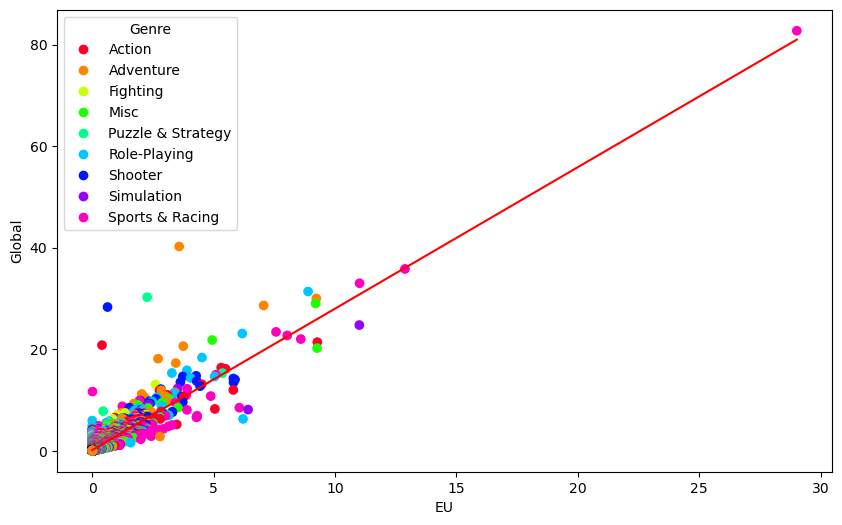

In [22]:
corr = round(st.pearsonr(sales_data_clean["EU_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#JP vs Global

x_values = sales_data_clean["EU_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("EU")
plt.ylabel("Global")
plt.show()

The correlation is 0.75.


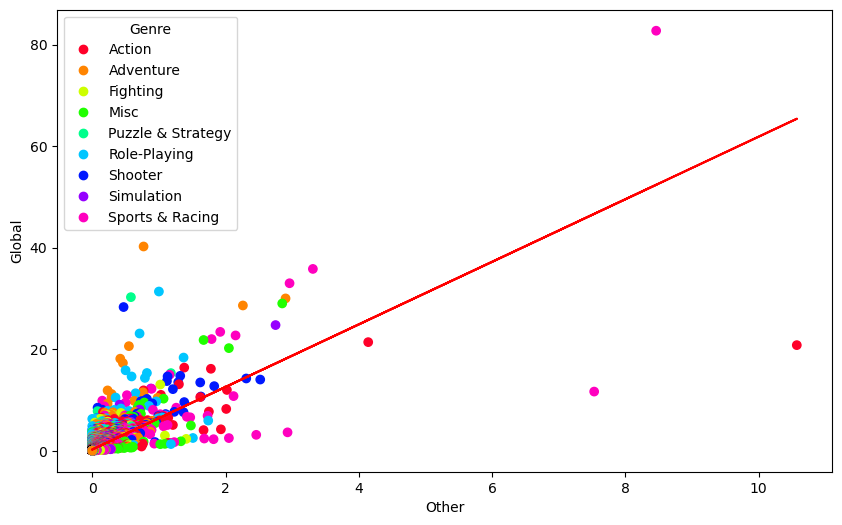

In [23]:
corr = round(st.pearsonr(sales_data_clean["Other_Sales"], sales_data_clean["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = sales_data_clean["Other_Sales"]
y_values = sales_data_clean["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = sales_data_clean.Genre.astype('category').cat.codes, cmap="gist_rainbow")

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_name,
           title="Genre")

plt.xlabel("Other")
plt.ylabel("Global")
plt.show()

In [24]:
world = sales_data_clean.groupby("Year")["Global_Sales"].sum()
NA = sales_data_clean.groupby("Year")["NA_Sales"].sum()
JP = sales_data_clean.groupby("Year")["JP_Sales"].sum()
EU = sales_data_clean.groupby("Year")["EU_Sales"].sum()
other = sales_data_clean.groupby("Year")["Other_Sales"].sum()

df2 = pd.DataFrame(
    {
        "Global" : world,
        "NA" : NA,
        "JP" : JP,
        "EU" : EU,
        "Other" : other
    }
)

df2

,Global,NA,JP,EU,Other
Year,,,,,
1980,11.38,10.59,0.00,0.67,0.12
1981,35.77,33.40,0.00,1.96,0.32
1982,28.86,26.92,0.00,1.65,0.31
1983,16.79,7.76,8.10,0.80,0.14
1984,50.36,33.28,14.27,2.10,0.70
1985,53.94,33.73,14.56,4.74,0.92
1986,37.07,12.50,19.81,2.84,1.93
1987,21.74,8.46,11.63,1.41,0.20
1988,47.22,23.87,15.76,6.59,0.99


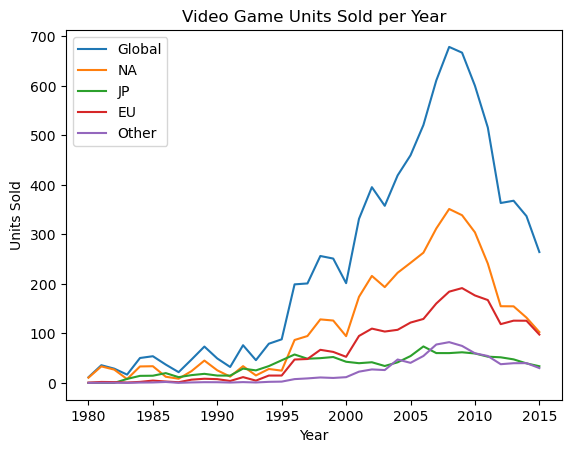

In [25]:
plt.plot(df2.index, df2["Global"], label = "Global")
plt.plot(df2.index, df2["NA"], label = "NA")
plt.plot(df2.index, df2["JP"], label = "JP")
plt.plot(df2.index, df2["EU"], label = "EU")
plt.plot(df2.index, df2["Other"], label = "Other")

plt.xlabel("Year")
plt.ylabel("Units Sold")
plt.legend()
plt.title("Video Game Units Sold per Year")

plt.show()

In [26]:
shooter = sales_data_clean[sales_data_clean["Genre"] == "Shooter"]
rpg = sales_data_clean[sales_data_clean["Genre"] == "Role-Playing"]
sports = sales_data_clean[sales_data_clean["Genre"] == "Sports & Racing"]
action = sales_data_clean[sales_data_clean["Genre"] == "Action"]
adv = sales_data_clean[sales_data_clean["Genre"] == "Adventure"]
fight = sales_data_clean[sales_data_clean["Genre"] == "Fighting"]

In [27]:
mix1 = sales_data_clean.loc[sales_data_clean.Genre.isin(["Shooter", "Role-Playing", "Sports & Racing"])]
genre_mix1 = []

for x in mix1["Genre"]:
    
    if x not in genre_mix1:
        genre_mix1.append(x)
genre_mix1.sort()

The correlation is 0.38.


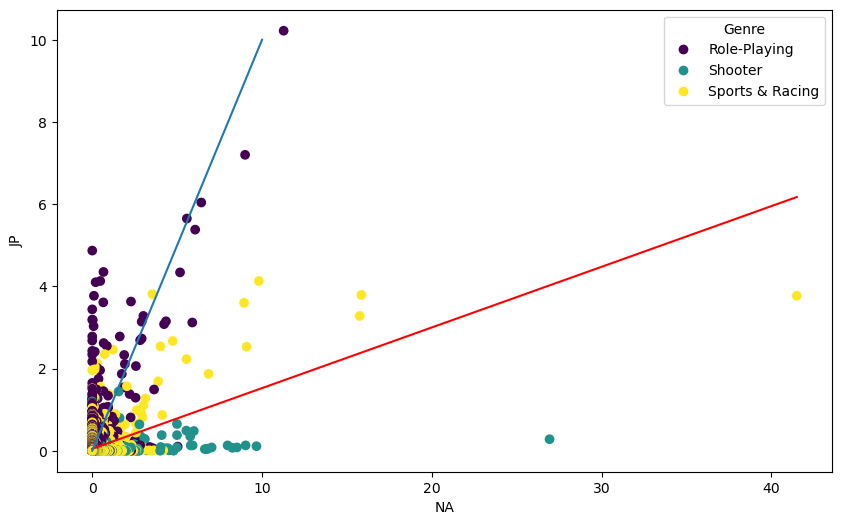

In [28]:
corr = round(st.pearsonr(mix1["NA_Sales"], mix1["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix1["NA_Sales"]
y_values = mix1["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix1.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")
x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix1,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("JP")
plt.show()

In [69]:
mix1.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Nintendo


In [71]:
mix1.loc[mix1.Genre=="Shooter"].sort_values(by="JP_Sales", ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company
235,Splatoon,WiiU,2015,Shooter,Nintendo,1.55,1.15,1.44,0.43,4.57,Nintendo
1234,Xevious,NES,1984,Shooter,Namco Bandai Games,0.18,0.06,1.27,0.01,1.52,Nintendo
1675,TwinBee,NES,1986,Shooter,Konami Digital Entertainment,0.00,0.00,1.20,0.00,1.20,Nintendo
1427,Gradius,NES,1986,Shooter,Konami Digital Entertainment,0.27,0.08,1.00,0.01,1.36,Nintendo
438,Resident Evil 6,PS3,2012,Shooter,Capcom,0.88,0.97,0.88,0.42,3.15,Sony
472,Star Fox,SNES,1993,Shooter,Nintendo,1.61,0.51,0.80,0.07,2.99,Nintendo
34,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,Sony
296,Star Fox 64,N64,1997,Shooter,Nintendo,2.78,0.58,0.64,0.04,4.03,Nintendo
3237,Virtua Cop,SAT,1995,Shooter,Sega,0.00,0.00,0.62,0.00,0.62,Sega
2158,Star Soldier,NES,1986,Shooter,Hudson Soft,0.32,0.06,0.57,0.01,0.96,Nintendo


The correlation is 0.81.


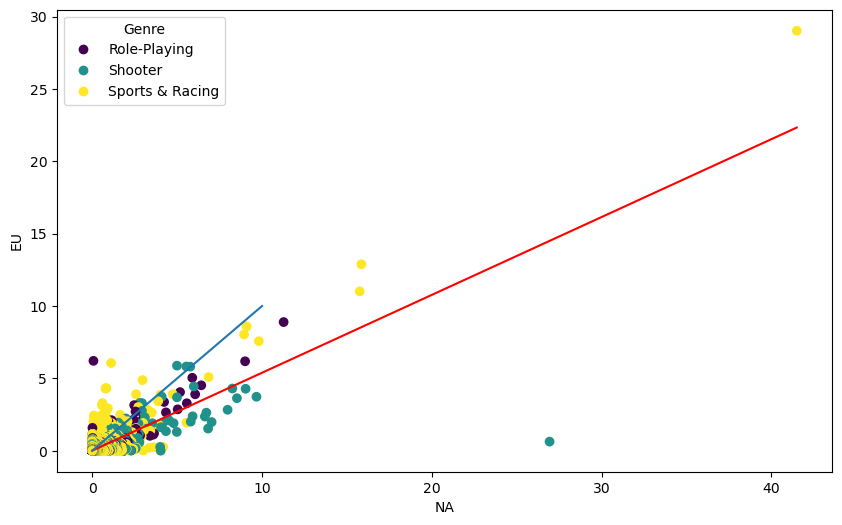

In [29]:
corr = round(st.pearsonr(mix1["NA_Sales"], mix1["EU_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix1["NA_Sales"]
y_values = mix1["EU_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix1.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")
x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix1,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("EU")
plt.show()

In [30]:
mix2 = sales_data_clean.loc[sales_data_clean.Genre.isin(["Action", "Adventure"])]
genre_mix2 = []

for x in mix2["Genre"]:
    
    if x not in genre_mix2:
        genre_mix2.append(x)
genre_mix2.sort()

The correlation is 0.66.


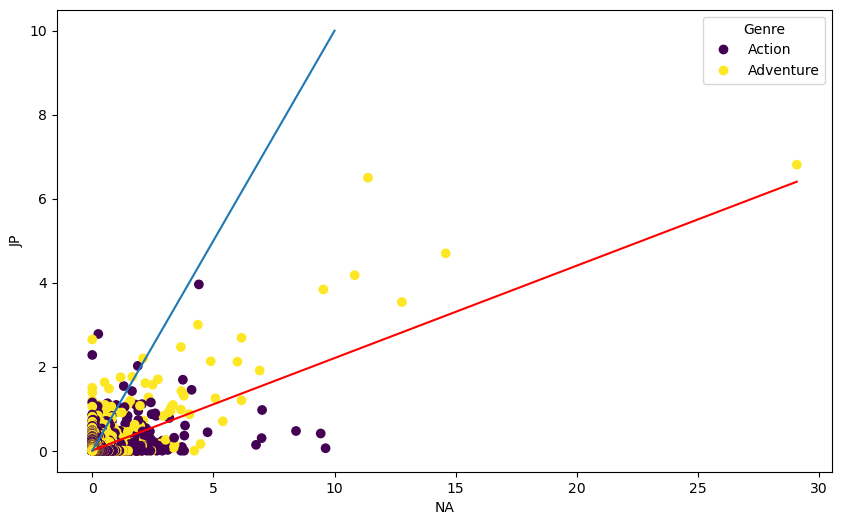

In [31]:
corr = round(st.pearsonr(mix2["NA_Sales"], mix2["JP_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix2["NA_Sales"]
y_values = mix2["JP_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix2.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")
x = np.linspace(0,10,100)
y = x
plt.plot(x,y)

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix2,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("JP")
plt.show()

The correlation is 0.96.


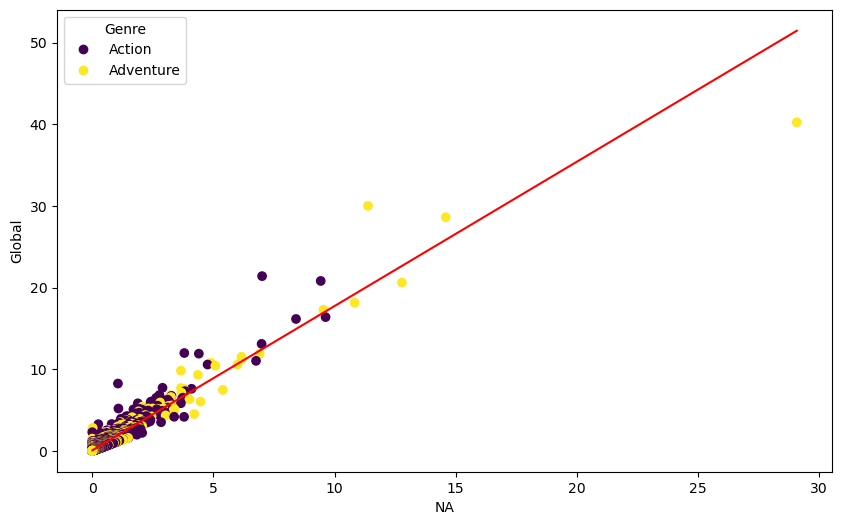

In [32]:
corr = round(st.pearsonr(mix2["NA_Sales"], mix2["Global_Sales"])[0],2)
print(f"The correlation is {corr}.")

#NA vs Global
x_values = mix2["NA_Sales"]
y_values = mix2["Global_Sales"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"Linear Regression Model: y = {round(slope,2)} x + {round(intercept,2)}"

plt.figure(figsize=(10,6))

scatter = plt.scatter(x_values, 
            y_values, 
            c = mix2.Genre.astype('category').cat.codes)

plt.plot(x_values,regress_values,"r-")

#plt.annotate(line_eq,(x_values.min(),y_values.max()),fontsize=15,color="red")
plt.legend(handles=scatter.legend_elements()[0], 
           labels = genre_mix2,
           title="Genre")

plt.xlabel("NA")
plt.ylabel("Global")
plt.show()

In [50]:
bins = [1980, 1989, 1999, 2009, 2015]
labels = ["1980s", "1990s", "2000s", "2010s"]

In [61]:
sales_decade = sales_data_clean.copy()

In [62]:
sales_decade["Decade"] = pd.cut(sales_decade["Year"],bins=bins, labels=labels)
sales_decade

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform Company,Decade
0,Wii Sports,Wii,2006,Sports & Racing,Nintendo,41.49,29.02,3.77,8.46,82.74,Nintendo,2000s
1,Super Mario Bros.,NES,1985,Adventure,Nintendo,29.08,3.58,6.81,0.77,40.24,Nintendo,1980s
2,Mario Kart Wii,Wii,2008,Sports & Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Nintendo,2000s
3,Wii Sports Resort,Wii,2009,Sports & Racing,Nintendo,15.75,11.01,3.28,2.96,33.00,Nintendo,2000s
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Nintendo,1990s
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Adventure,Kemco,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,Nintendo,2000s
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Sports & Racing,Activision,0.00,0.00,0.00,0.00,0.01,Sony,2000s
16596,Know How 2,DS,2010,Puzzle & Strategy,7G//AMES,0.00,0.01,0.00,0.00,0.01,Nintendo,2010s


In [65]:
decade = sales_decade.groupby(["Decade", "Genre"]).size().reset_index()
decade.columns = ["Decade",  "Genre", "Count"]
decade

,Decade,Genre,Count
0,1980s,Action,65
1,1980s,Adventure,35
2,1980s,Fighting,3
3,1980s,Misc,4
4,1980s,Puzzle & Strategy,19
5,1980s,Role-Playing,9
6,1980s,Shooter,28
7,1980s,Simulation,3
8,1980s,Sports & Racing,30
9,1990s,Action,162


In [66]:
sub = decade.loc[decade["Decade"] == "1980s"]
sub

,Decade,Genre,Count
0,1980s,Action,65
1,1980s,Adventure,35
2,1980s,Fighting,3
3,1980s,Misc,4
4,1980s,Puzzle & Strategy,19
5,1980s,Role-Playing,9
6,1980s,Shooter,28
7,1980s,Simulation,3
8,1980s,Sports & Racing,30


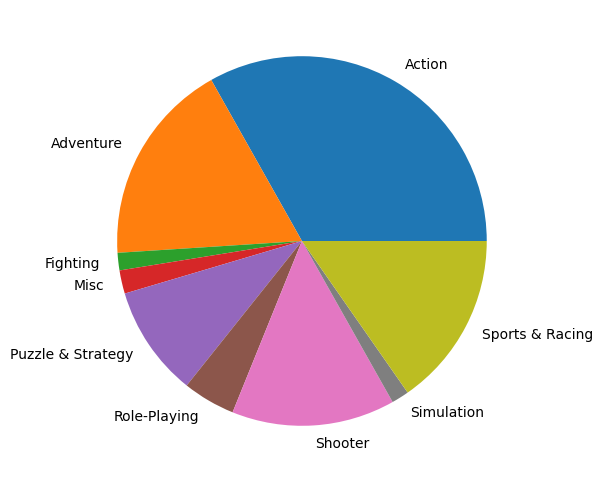

In [68]:
plt.figure(figsize=(10,6))
plt.pie(sub.Count, labels = sub.Genre)
plt.show()